<a href="https://colab.research.google.com/github/forkedroads/classic-ml/blob/master/prework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://edlitera-images.s3.us-east-1.amazonaws.com/edlitera_logo.png" width="500"/>
</div>

# Pre-work

**NOTE:**

Please review the concepts below. Familiarity with them will be essential for your understanding of the material covered in the class. If you feel uncomfortable with the topics below, please cosider taking a _Python for Data Processing_ class.

<br/>
<br/>
<br/>
<br/>

# Importing Modules

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

<br/>
<br/>
<br/>
<br/>

# Series

### Create a Series from a list.

In [ ]:
s = Series([5,6,3,7,9,0])
print('Series:')
print(s)

print('\nSeries values:')
print(s.values)

print('\nSeries index:')
print(s.index)

Series:
0    5
1    6
2    3
3    7
4    9
5    0
dtype: int64

Series values:
[5 6 3 7 9 0]

Series index:
RangeIndex(start=0, stop=6, step=1)


### Specify a custom index.

In [ ]:
s = Series([5,6,3,7,9,0], index=['a', 'b', 'c', 'd', 'e', 'f'])
print('Series:')
print(s)

Series:
a    5
b    6
c    3
d    7
e    9
f    0
dtype: int64


### Use a custom index when accessing values inside the series.

In [ ]:
print(s['a'])

5


### Labels inside an index don't have to be unique.

In [ ]:
s = Series([5,6,3,7,9,0], index=['a', 'a', 'c', 'd', 'e', 'f'])
print(s['a'])

a    5
a    6
dtype: int64


### Values inside the series are stored in a NumPy ndarray.

In [ ]:
s = Series([5,6,3,7,9,0])
type(s.values)

numpy.ndarray

### The index of the series is stored in a special data structure called Index.

In [ ]:
s = Series([5,6,3,7,9,0], index=['a', 'b', 'c', 'd', 'e', 'f'])
print(s.index)
type(s.index)

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')


pandas.core.indexes.base.Index

### Create a series from a dictionary.

The dictionary keys become the index values and the dictionary values become the series values.

In [ ]:
s = Series({'a': 1, 'b': 2, 'c': 3})
print(s)

a    1
b    2
c    3
dtype: int64


Fun fact: operators are applied element-wise. So, >, <, == etc. are applied to each element and then a series containing boolean values is returned.

In [ ]:
s = Series([5,6,3,7,9,0])
s > 3

0     True
1     True
2    False
3     True
4     True
5    False
dtype: bool

### Filter elements in a series.

We could do this with for loops, but it would be order of magnitutes slower. ndarrays are optimized for speed.

In [ ]:
s = Series([5,6,3,7,9,0])
s[s > 3]

0    5
1    6
3    7
4    9
dtype: int64

### Add, multiply, subtract etc. two series.

NOTE: the operation must make sense.

In [ ]:
s1 = Series([5,6,3,0,4])
s2 = Series([1,2,1,1])
s2 - s1 # s1 has more values than s2 - notice the NaN at the end

0   -4.0
1   -4.0
2   -2.0
3    1.0
4    NaN
dtype: float64

NOTE: series items are matched by index labels!

In [ ]:
s1 = Series([5,6,3,0,4], index=[0,0,0,0,0])
s2 = Series([1,2,3,4], index=[0,1,2,3])
s1 - s2 # the unmatched values are added at the end and marked as NaN

0    4.0
0    5.0
0    2.0
0   -1.0
0    3.0
1    NaN
2    NaN
3    NaN
dtype: float64

<br/>
<br/>
<br/>
<br/>

# DataFrames

### Create a dataframe from a two-dimensional ndarray.

Here we generate random numbers (from 0 to 100) and store them in an ndarray of size 5 x 3 (5 rows, 3 columns). We can use this ndarray to create a DataFrame.

In [ ]:
import numpy as np

df = DataFrame(np.random.randint(0,100,size=(5, 3)))
df # notice how the index and the columns are autopopulated

,0,1,2
0,41,54,90
1,56,83,55
2,36,51,51
3,30,52,86
4,72,11,11


### Specify custom index labels / column names.

In [ ]:
df = DataFrame(
    np.random.randint(0,1000,size=(5, 3)), 
    index=['a', 'b', 'c', 'd', 'e'], 
    columns=['Col1', 'Col2', 'Col3']
)

df

,Col1,Col2,Col3
a,110,395,234
b,10,749,12
c,590,64,277
d,670,416,896
e,689,377,617


### Create a DataFrame by reading in a CSV file.

Can also read Excel files, fixed-width column files etc.

In [ ]:
df = pd.read_csv("https://edlitera-datasets.s3.us-east-1.amazonaws.com/bookstore_data.csv")

### The row index of a DataFrame is stored in an Index object.

In [ ]:
df.columns

Index(['date', 'user_id', 'product_name', 'quantity', 'price_per_unit'], dtype='object')

In [ ]:
type(df.index)

pandas.core.indexes.range.RangeIndex

### The columns of a DataFrame are also stored in an Index object.

In [ ]:
type(df.columns)

pandas.core.indexes.base.Index

### The values of a DataFrame are stored in a two dimensional ndarray.

In [ ]:
df.values

array([['2016/09/13', 147520, 'Catch 22', 1, 35],
       ['2016/09/16', 147568, 'The Lord of the Rings', 1, 27],
       ['2016/09/16', 150011, 'The Catcher In The Rye', 1, 11],
       ...,
       ['2016/10/15', 149011, 'On the Road', 1, 24],
       ['2016/10/15', 147415, 'Brave New World', 2, 17],
       ['2016/10/15', 149501, 'The Lord of the Rings', 1, 27]],
      dtype=object)

### Display the first few rows using the `head()` method.

Optional: specify the number of rows that you want to see.

In [ ]:
df.head(3) 

,date,user_id,product_name,quantity,price_per_unit
0,2016/09/13,147520,Catch 22,1,35
1,2016/09/16,147568,The Lord of the Rings,1,27
2,2016/09/16,150011,The Catcher In The Rye,1,11


### By default, head() shows the first 5 rows.

In [ ]:
df.head()

,date,user_id,product_name,quantity,price_per_unit
0,2016/09/13,147520,Catch 22,1,35
1,2016/09/16,147568,The Lord of the Rings,1,27
2,2016/09/16,150011,The Catcher In The Rye,1,11
3,2016/09/18,148377,Catch 22,1,35
4,2016/09/19,150665,On the Road,1,24


### Display the last 5 rows of a DataFrame.

In [ ]:
df.tail()

,date,user_id,product_name,quantity,price_per_unit
995,2016/10/15,151781,Nineteen Eighty Four,1,20
996,2016/10/15,148380,The Lord of the Rings,2,27
997,2016/10/15,149011,On the Road,1,24
998,2016/10/15,147415,Brave New World,2,17
999,2016/10/15,149501,The Lord of the Rings,1,27


### List the columns of a DataFrame.

In [ ]:
df.columns

Index(['date', 'user_id', 'product_name', 'quantity', 'price_per_unit'], dtype='object')

### Display the row index of a DataFrame.

In this case, we didn't specify a custom index, so a RangeIndex was automatically created for us (RangeIndex is a type of Index).

In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

### 'Extract' a specific column from a dataframe.

Doing this will give us a Series!

In [ ]:
df['date']

0      2016/09/13
1      2016/09/16
2      2016/09/16
3      2016/09/18
4      2016/09/19
          ...    
995    2016/10/15
996    2016/10/15
997    2016/10/15
998    2016/10/15
999    2016/10/15
Name: date, Length: 1000, dtype: object

### Access more than one column actually.

In [ ]:
df[['product_name', 'quantity']]

,product_name,quantity
0,Catch 22,1
1,The Lord of the Rings,1
2,The Catcher In The Rye,1
3,Catch 22,1
4,On the Road,1
...,...,...
995,Nineteen Eighty Four,1
996,The Lord of the Rings,2
997,On the Road,1
998,Brave New World,2


### Selecting more than one column gives us a DataFrame.

In [ ]:
type(df[['product_name', 'quantity']])

pandas.core.frame.DataFrame

### Selecting one column gives us a Series.

In [ ]:
type(df['product_name'].head())

pandas.core.series.Series

Convert a series into a Dataframe

In [ ]:
# pd.DataFrame([df['product_name']])-> This will result in a transposed version
df['product_name'].to_frame().head()

,product_name
0,Catch 22
1,The Lord of the Rings
2,The Catcher In The Rye
3,Catch 22
4,On the Road


### Access rows using `loc` or `iloc`.

The line below returns the first row.

In [ ]:
df.loc[0]

date              2016/09/13
user_id               147520
product_name        Catch 22
quantity                   1
price_per_unit            35
Name: 0, dtype: object

### Access multiple rows.

Rows 0 through 5.

In [ ]:
df.loc[0:5]

,date,user_id,product_name,quantity,price_per_unit
0,2016/09/13,147520,Catch 22,1,35
1,2016/09/16,147568,The Lord of the Rings,1,27
2,2016/09/16,150011,The Catcher In The Rye,1,11
3,2016/09/18,148377,Catch 22,1,35
4,2016/09/19,150665,On the Road,1,24
5,2016/09/20,147624,To Kill a Mockingbird,1,22


In [ ]:
df.iloc[0:5]

,date,user_id,product_name,quantity,price_per_unit
0,2016/09/13,147520,Catch 22,1,35
1,2016/09/16,147568,The Lord of the Rings,1,27
2,2016/09/16,150011,The Catcher In The Rye,1,11
3,2016/09/18,148377,Catch 22,1,35
4,2016/09/19,150665,On the Road,1,24


Difference between loc and iloc

In [ ]:
new_df = df.head(5)
new_df = new_df.set_index('user_id')
print(new_df)
# loc uses the index as a label
print(new_df.loc[147520])
#iloc uses the index as a position
print(new_df.iloc[0])

               date            product_name  quantity  price_per_unit
user_id                                                              
147520   2016/09/13                Catch 22         1              35
147568   2016/09/16   The Lord of the Rings         1              27
150011   2016/09/16  The Catcher In The Rye         1              11
148377   2016/09/18                Catch 22         1              35
150665   2016/09/19             On the Road         1              24
date              2016/09/13
product_name        Catch 22
quantity                   1
price_per_unit            35
Name: 147520, dtype: object
date              2016/09/13
product_name        Catch 22
quantity                   1
price_per_unit            35
Name: 147520, dtype: object


All rows, but only columns `date` and `user_id`.

In [ ]:
df.loc[:, ['date', 'user_id']]

,date,user_id
0,2016/09/13,147520
1,2016/09/16,147568
2,2016/09/16,150011
3,2016/09/18,148377
4,2016/09/19,150665
...,...,...
995,2016/10/15,151781
996,2016/10/15,148380
997,2016/10/15,149011
998,2016/10/15,147415


You can access columns by index using `iloc`.

In [ ]:
df.iloc[:, [0, 1]]

,date,user_id
0,2016/09/13,147520
1,2016/09/16,147568
2,2016/09/16,150011
3,2016/09/18,148377
4,2016/09/19,150665
...,...,...
995,2016/10/15,151781
996,2016/10/15,148380
997,2016/10/15,149011
998,2016/10/15,147415


### Drop columns.

NOTE: this won't actually modify the DataFrame it will return a 'view' with the columns dropped. You can add the optional `inplace=True` parameter to drop the column in place.

In [ ]:
df.drop('date', axis=1)

,user_id,product_name,quantity,price_per_unit
0,147520,Catch 22,1,35
1,147568,The Lord of the Rings,1,27
2,150011,The Catcher In The Rye,1,11
3,148377,Catch 22,1,35
4,150665,On the Road,1,24
...,...,...,...,...
995,151781,Nineteen Eighty Four,1,20
996,148380,The Lord of the Rings,2,27
997,149011,On the Road,1,24
998,147415,Brave New World,2,17


### Drop rows.

NOTE: this won't actually modify the DataFrame. It will return a 'view' with the columns dropped. You can add the optional `inplace=True` parameter to drop the rows in place.

In [ ]:
df.drop([0,3], axis=0)

,date,user_id,product_name,quantity,price_per_unit
1,2016/09/16,147568,The Lord of the Rings,1,27
2,2016/09/16,150011,The Catcher In The Rye,1,11
4,2016/09/19,150665,On the Road,1,24
5,2016/09/20,147624,To Kill a Mockingbird,1,22
6,2016/09/21,146631,On the Road,1,24
...,...,...,...,...,...
995,2016/10/15,151781,Nineteen Eighty Four,1,20
996,2016/10/15,148380,The Lord of the Rings,2,27
997,2016/10/15,149011,On the Road,1,24
998,2016/10/15,147415,Brave New World,2,17


<br/>
<br/>
<br/>
<br/>

# Dataframe Slicing

### Use slicing to select rows.

Below, we select all rows with an index 20 or higher.

In [ ]:
df[20:] 

,date,user_id,product_name,quantity,price_per_unit
20,2016/09/26,151179,Catch 22,1,35
21,2016/09/26,148575,One Hundred Years of Solitude,-1,9
22,2016/09/26,148058,To Kill a Mockingbird,1,22
23,2016/09/26,146595,To Kill a Mockingbird,2,22
24,2016/09/27,149274,On the Road,2,24
...,...,...,...,...,...
995,2016/10/15,151781,Nineteen Eighty Four,1,20
996,2016/10/15,148380,The Lord of the Rings,2,27
997,2016/10/15,149011,On the Road,1,24
998,2016/10/15,147415,Brave New World,2,17


Below, we select all rows with an index location between 10 and 20.

In [ ]:
df[10:20]

,date,user_id,product_name,quantity,price_per_unit
10,2016/09/23,150473,Nineteen Eighty Four,1,20
11,2016/09/23,145717,The Catcher In The Rye,2,11
12,2016/09/23,150629,Nineteen Eighty Four,1,20
13,2016/09/23,149015,Nineteen Eighty Four,-1,20
14,2016/09/23,150135,Ulysses,2,7
15,2016/09/24,149413,Lolita,1,30
16,2016/09/24,148328,The Catcher In The Rye,1,11
17,2016/09/25,150747,Nineteen Eighty Four,2,20
18,2016/09/25,146767,Lolita,-1,30
19,2016/09/25,149414,Brave New World,1,17


### Select every other row.

In [ ]:
df[10:20:2]

,date,user_id,product_name,quantity,price_per_unit
10,2016/09/23,150473,Nineteen Eighty Four,1,20
12,2016/09/23,150629,Nineteen Eighty Four,1,20
14,2016/09/23,150135,Ulysses,2,7
16,2016/09/24,148328,The Catcher In The Rye,1,11
18,2016/09/25,146767,Lolita,-1,30


### Slicing only a subset of the DataFrame.

In [ ]:
df[['user_id', 'product_name']][30:40]

,user_id,product_name
30,148336,To Kill a Mockingbird
31,150316,Lolita
32,149069,Brave New World
33,153074,The Lord of the Rings
34,148561,On the Road
35,151175,On the Road
36,147294,On the Road
37,145966,Lolita
38,146419,The Grapes Of Wrath
39,152954,The Lord of the Rings


### Get all unique entries in a column.

In [ ]:
df['product_name'].unique()

array(['Catch 22', 'The Lord of the Rings', 'The Catcher In The Rye',
       'On the Road', 'To Kill a Mockingbird', 'Brave New World',
       'The Great Gatsby', 'Nineteen Eighty Four', 'Ulysses', 'Lolita',
       'One Hundred Years of Solitude', 'The Grapes Of Wrath'],
      dtype=object)

### Add a new column to the DataFrame

Below, we create a new column called `amount` which is equal to `auantity * price_per_unit`.

In [ ]:
df['amount'] = df['quantity'] * df['price_per_unit']

In [ ]:
df.head()

,date,user_id,product_name,quantity,price_per_unit,amount
0,2016/09/13,147520,Catch 22,1,35,35
1,2016/09/16,147568,The Lord of the Rings,1,27,27
2,2016/09/16,150011,The Catcher In The Rye,1,11,11
3,2016/09/18,148377,Catch 22,1,35,35
4,2016/09/19,150665,On the Road,1,24,24


<br/>
<br/>
<br/>
<br/>

# Filtering

### Filter by matching a column to a value.

Below, we create a new DataFrame, called `books`, which contains only rows where the `product_name` is `Lolita`. Then we return the first 5 entries from that dataframe.

In [ ]:
books = df[df['product_name'] == 'Lolita']
books[:5]

,date,user_id,product_name,quantity,price_per_unit,amount
15,2016/09/24,149413,Lolita,1,30,30
18,2016/09/25,146767,Lolita,-1,30,-30
31,2016/09/27,150316,Lolita,2,30,60
37,2016/09/28,145966,Lolita,2,30,60
40,2016/09/29,147527,Lolita,1,30,30


### Example: get all purchases with an amount more than $80.

In [ ]:
df[df['amount'] > 80]

,date,user_id,product_name,quantity,price_per_unit,amount
62,2016/10/01,151802,The Lord of the Rings,3,27,81
280,2016/10/09,149287,Catch 22,3,35,105
392,2016/10/11,150356,Lolita,3,30,90
756,2016/10/14,148438,The Lord of the Rings,3,27,81


### Example: how many entries do we have for Catch-22?

NOTE: we can use the shape property - returns a tuple representing the dimensions of the DataDrame:
* `shape[0]` - rows
* `shape[1]` - columns

In [ ]:
df[df['product_name'] == 'Catch 22'].shape[0]

155

Number of columns:

In [ ]:
df[df['product_name'] == 'Catch 22'].shape[1]

6

### Example: which books cost less than $20?

In [ ]:
books_df = df[df['price_per_unit'] < 20]
books_df['product_name'].unique()

array(['The Catcher In The Rye', 'Brave New World', 'The Great Gatsby',
       'Ulysses', 'One Hundred Years of Solitude', 'The Grapes Of Wrath'],
      dtype=object)

### Example: Which books cost less than $20, and have a quantity of 1, 0 or -1?

NOTE: use `&` for `and`, `|` for `o`r and `~` for `not`. Pay attention to the paranthesis - they are important!

In [ ]:
df[(df['price_per_unit'] < 20) & ~(df['quantity'] > 1)].head()

,date,user_id,product_name,quantity,price_per_unit,amount
2,2016/09/16,150011,The Catcher In The Rye,1,11,11
9,2016/09/22,152572,The Great Gatsby,1,10,10
16,2016/09/24,148328,The Catcher In The Rye,1,11,11
19,2016/09/25,149414,Brave New World,1,17,17
21,2016/09/26,148575,One Hundred Years of Solitude,-1,9,-9


<br/>
<br/>
<br/>
<br/>

# Advanced Column Creation

### How might we go about creating a flag for those books that cost less than $20?

First, write a function that takes a row and returns `True` or `False` based on our condition.

In [ ]:
def low_cost(row):
    return row['price_per_unit'] < 20

Then, apply it to each row (note: `axis=1` because we're adding a column):

In [ ]:
df['low_cost'] = df.apply(low_cost, axis=1)
df.head()

,date,user_id,product_name,quantity,price_per_unit,amount,low_cost
0,2016/09/13,147520,Catch 22,1,35,35,False
1,2016/09/16,147568,The Lord of the Rings,1,27,27,False
2,2016/09/16,150011,The Catcher In The Rye,1,11,11,True
3,2016/09/18,148377,Catch 22,1,35,35,False
4,2016/09/19,150665,On the Road,1,24,24,False


<br/>
<br/>
<br/>
<br/>

# Get basic statistics and other information about a DataFrame

In [ ]:
df.describe()

,user_id,quantity,price_per_unit,amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,149267.291000,1.171000,22.654000,26.658000
std,1809.432622,0.718523,8.471957,20.079198
min,145677.000000,-1.000000,7.000000,-35.000000
25%,147922.000000,1.000000,17.000000,17.000000
50%,149177.500000,1.000000,22.000000,24.000000
75%,150557.750000,2.000000,30.000000,35.000000
max,154723.000000,3.000000,35.000000,105.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1000 non-null   object
 1   user_id         1000 non-null   int64 
 2   product_name    1000 non-null   object
 3   quantity        1000 non-null   int64 
 4   price_per_unit  1000 non-null   int64 
 5   amount          1000 non-null   int64 
 6   low_cost        1000 non-null   bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 48.0+ KB


<br/>
<br/>
<br/>
<br/>

# Plotting using `matplotlib` and the `seaborn` library

Import required modules. 

**NOTES:** 

* `%matplotlib inline` sets the matplotlib backend 'inline', meaning all plots will be displayed underneath the code cell.

* `sn.set()` sets the default seaborn theme.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
sn.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Countplots
Show counts of each unique value in a column

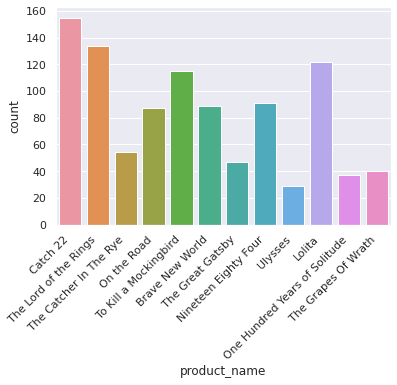

In [ ]:
plot = sn.countplot(df['product_name'])
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Histograms
Draw histograms for all the numerical columns in a DataFrame.

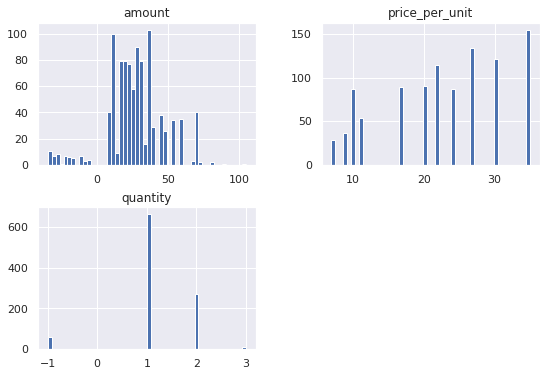

In [ ]:
df[['price_per_unit', 'quantity', 'amount']].hist(bins=50, figsize=(9, 6))
plt.show()

### Scatterplots

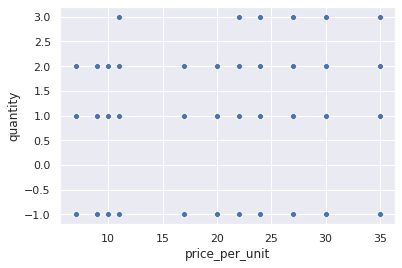

In [ ]:
sn.scatterplot(x='price_per_unit', y='quantity', data=df)
plt.show()